In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# Code for the repetative 

In [2]:
housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

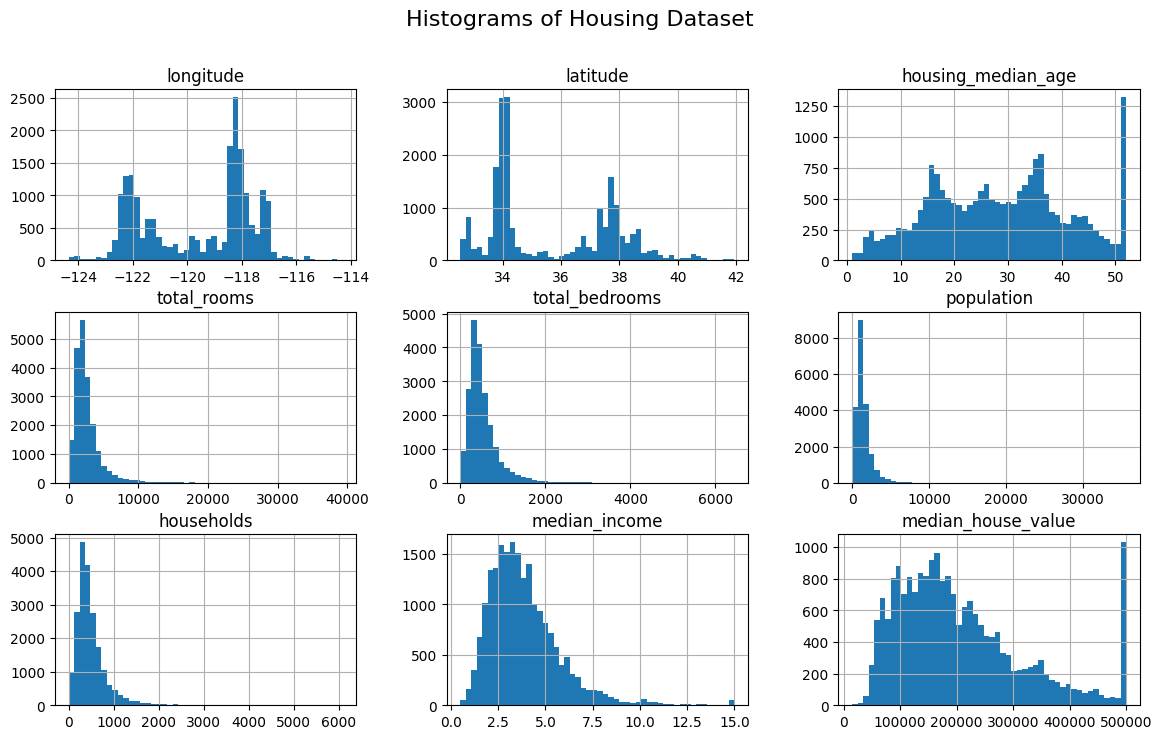

In [7]:
housing.hist(bins=50, figsize=(14, 8))
plt.suptitle("Histograms of Housing Dataset", fontsize=16)
plt.show()

Many histograms are left skewed , because of that the some machine learning not working the properly beacuse cant not dectect the pattern very well and try the attributes to have symmetrical and i have to make them as bell shaped 

In [8]:
housing.shape   # rows = 20640 , col = 10

(20640, 10)

In [9]:
## new column  
housing['income_cat'] = pd.cut(
     housing['median_income'] , 
     bins = [0,1.5 , 3.0 , 4.5 , 6 , np.inf] , 
     labels = [1,2,3,4,5]
     
    )

In [10]:
housing.shape # after adding the income_cat columns

(20640, 11)

Text(0, 0.5, 'Number Districts')

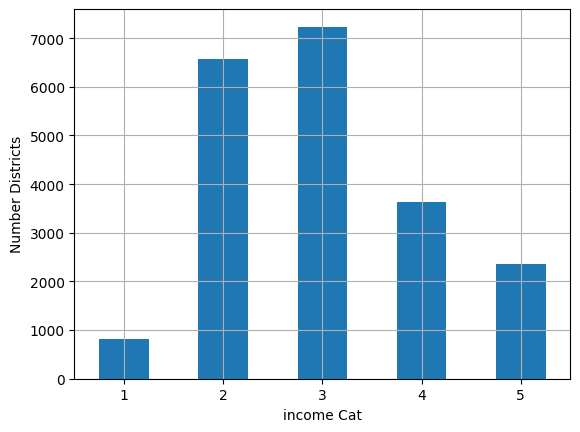

In [11]:
housing.income_cat.value_counts().sort_index().plot.bar(rot = 0 , grid= True)
plt.xlabel("income Cat")
plt.ylabel("Number Districts")

In [12]:
 housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5


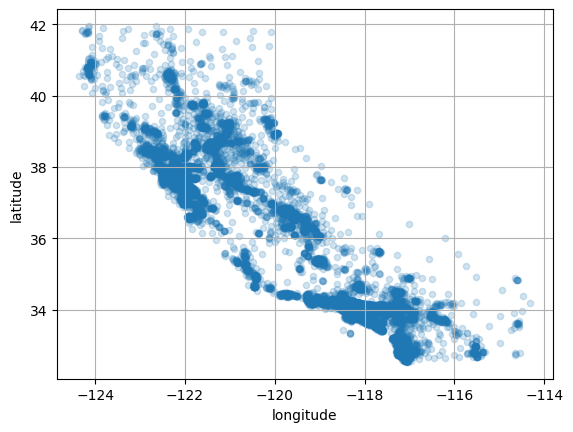

In [13]:
housing.plot(kind='scatter' , x='longitude', y='latitude',grid = True , alpha = 0.2 )
plt.show()

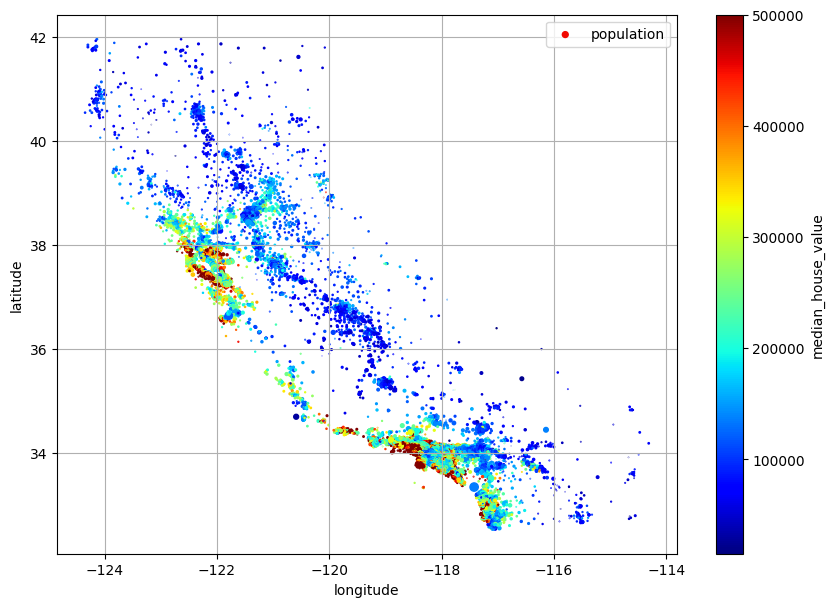

In [14]:
housing.plot(kind='scatter' , x='longitude', y='latitude',
            s= housing['population']/1000 , label ='population' ,
            c = 'median_house_value' , cmap = 'jet' , colorbar = True ,
             legend = True  , sharex = False , figsize = (10,7), 
             
             
             
             grid = True  )
plt.show()

In [15]:
ess = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
 'median_income','median_house_value','income_cat']
housing_corr = housing[ess]



In [16]:
housing_corr.shape  ## removing the ocean_proximity for the correlation 

(20640, 10)

In [17]:
y = housing_corr.corr()

In [18]:
y['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [19]:
columns_imp_scatter = ['median_house_value',
 'median_income',
 'total_rooms',
 'housing_median_age']

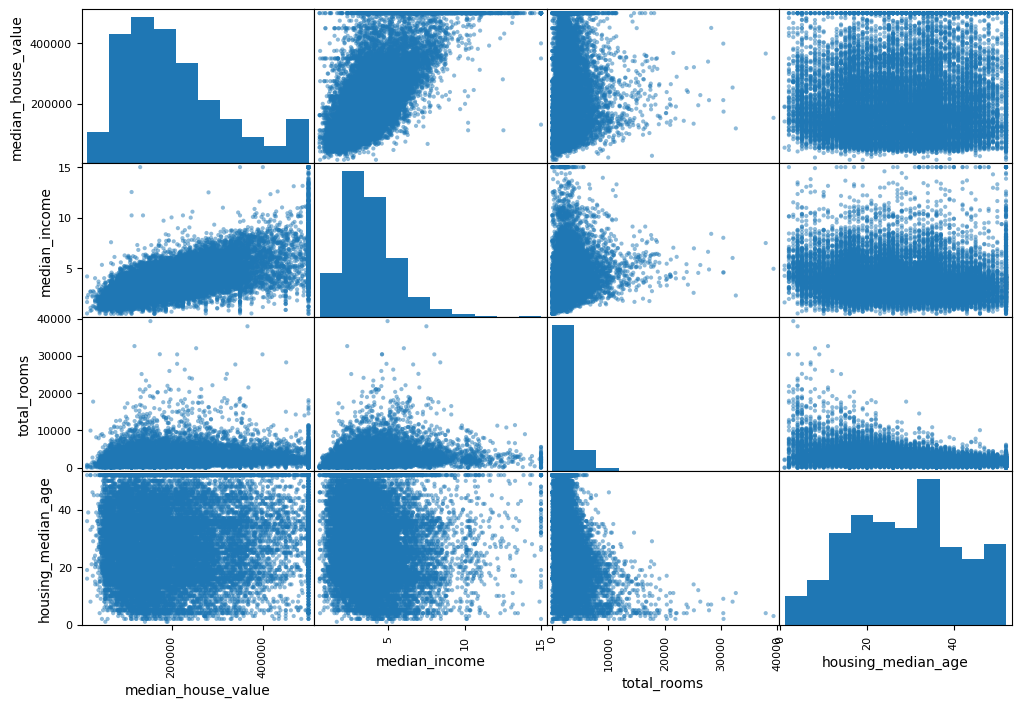

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[columns_imp_scatter] , figsize = (12,8))
plt.show()

In [21]:
## adding the new columns for better correlation 
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

 

In [22]:
housing.shape

(20640, 12)

In [23]:
housing_corr.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### primary split the data

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'],random_state=111)
train_set.shape, test_set.shape

((16512, 12), (4128, 12))

In [25]:
train_set.shape , test_set.shape

((16512, 12), (4128, 12))

In [26]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,321200.0,NEAR OCEAN,3,5.850490
12038,-117.47,33.91,21.0,3491.0,760.0,1920.0,669.0,2.2241,127300.0,INLAND,2,5.218236
18528,-122.04,36.96,44.0,1294.0,269.0,645.0,259.0,3.2437,223900.0,NEAR OCEAN,3,4.996139
8096,-118.21,33.81,45.0,1693.0,337.0,1255.0,333.0,3.6923,159700.0,NEAR OCEAN,3,5.084084
7717,-118.13,33.94,34.0,522.0,138.0,373.0,139.0,3.5481,265000.0,<1H OCEAN,3,3.755396


### Prepare the Data

In [27]:
housing = train_set.drop('median_house_value', axis = 1)
housing_labels = train_set['median_house_value'].copy()

In [28]:
housing.shape

(16512, 11)

In [29]:
len(housing_labels)

16512

## Clean the Data

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,NEAR OCEAN,3,5.850490
12038,-117.47,33.91,21.0,3491.0,760.0,1920.0,669.0,2.2241,INLAND,2,5.218236
18528,-122.04,36.96,44.0,1294.0,269.0,645.0,259.0,3.2437,NEAR OCEAN,3,4.996139
8096,-118.21,33.81,45.0,1693.0,337.0,1255.0,333.0,3.6923,NEAR OCEAN,3,5.084084
7717,-118.13,33.94,34.0,522.0,138.0,373.0,139.0,3.5481,<1H OCEAN,3,3.755396


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16072 to 19350
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16349 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
 10  rooms_per_house     16512 non-null  float64 
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [32]:
## what is imputation ---> it is the filling feature with zero , mean , meadian
## you can work on these easity using methods are dropna() , fillna() , drop()


median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median , inplace = True)

median

434.0

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [34]:
## only select the numeric data
housing_num = housing.select_dtypes(include = [np.number])

In [35]:
housing_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,5.850490
12038,-117.47,33.91,21.0,3491.0,760.0,1920.0,669.0,2.2241,5.218236


In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.49      ,   34.25      ,   29.        , 2124.        ,
        434.        , 1166.        ,  409.        ,    3.54425   ,
          5.23413638])

In [38]:
housing_num.median().values

array([-118.49      ,   34.25      ,   29.        , 2124.        ,
        434.        , 1166.        ,  409.        ,    3.54425   ,
          5.23413638])

##### the mean value (strategy="mean"),or with the most frequent value (strategy="most_frequent"), or with a constant value (strategy="constant", fill_value=…)

In [39]:
# Tranasform the data with median
X = imputer.transform(housing_num)

In [40]:
X

array([[-122.49      ,   37.75      ,   48.        , ...,  408.        ,
           3.7562    ,    5.8504902 ],
       [-117.47      ,   33.91      ,   21.        , ...,  669.        ,
           2.2241    ,    5.21823617],
       [-122.04      ,   36.96      ,   44.        , ...,  259.        ,
           3.2437    ,    4.996139  ],
       ...,
       [-118.39      ,   33.85      ,   24.        , ...,  824.        ,
           5.7128    ,    5.30703883],
       [-121.22      ,   38.8       ,   11.        , ...,  477.        ,
           3.5265    ,    5.2851153 ],
       [-122.94      ,   38.57      ,   33.        , ...,  250.        ,
           5.1005    ,    6.12      ]])

#### KNNImputer replaces each missing value with the mean of the k-nearest neighbors 
#### IterativeImputer trains a regression model per feature to predict the missing values based on all the other available features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration.


Estimator ---> fit() ,transform() , fit_transform() , predicator()


In [41]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns,index = housing_num.index)

In [42]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,5.850490
12038,-117.47,33.91,21.0,3491.0,760.0,1920.0,669.0,2.2241,5.218236
18528,-122.04,36.96,44.0,1294.0,269.0,645.0,259.0,3.2437,4.996139
8096,-118.21,33.81,45.0,1693.0,337.0,1255.0,333.0,3.6923,5.084084
7717,-118.13,33.94,34.0,522.0,138.0,373.0,139.0,3.5481,3.755396


In [43]:
housing.head(1)
 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,NEAR OCEAN,3,5.85049


### Handaling the Text and categorical Attributes

In [44]:
## for this sklearn have the ordinalencoder 

from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[['ocean_proximity']]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded  = ordinal_encoder.fit_transform(housing_cat)

In [45]:
housing_cat_encoded[:8]

array([[4.],
       [1.],
       [4.],
       [4.],
       [0.],
       [3.],
       [1.],
       [4.]])

In [46]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
## Convert the categorical data into the onehot encoder format 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)



In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
# df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
# pd.get_dummies(df_test)
# cat_encoder.transform(df_test)

# df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
# df_test_unknown
# pd.get_dummies(df_test_unknown)
# cat_encoder.handle_unknown = "ignore"
# cat_encoder.transform(df_test_unknown)

# df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
# columns=cat_encoder.get_feature_names_out(),
# index=df_test_unknown.index)

In [51]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [52]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformertion

One of the most important transformations you need to apply to your data is
feature scaling. With few exceptions, machine learning algorithms don’t
perform well when the input numerical attributes have very different scales.
This is the case for the housing data: the total number of rooms ranges from
about 6 to 39,320, while the median incomes only range from 0 to 15.
Without any scaling, most models will be biased toward ignoring the median
income and focusing more on the number of rooms.
There are two common ways to get all attributes to have the same scale: ***minmax scaling*** and 
***standardization***.


In [53]:
from sklearn.preprocessing import MinMaxScaler 

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [54]:
housing_num_min_max_scaled

array([[-0.62348178,  0.10733262,  0.84313725, ..., -0.86614044,
        -0.55086137, -0.92904818],
       [ 0.39271255, -0.7088204 , -0.21568627, ..., -0.78029929,
        -0.76218259, -0.93801232],
       [-0.53238866, -0.06057386,  0.68627451, ..., -0.91514554,
        -0.62155005, -0.94116123],
       ...,
       [ 0.20647773, -0.72157279, -0.09803922, ..., -0.72932084,
        -0.28098923, -0.93675327],
       [-0.36639676,  0.33049947, -0.60784314, ..., -0.8434468 ,
        -0.58254369, -0.9370641 ],
       [-0.7145749 ,  0.2816153 ,  0.25490196, ..., -0.91810557,
        -0.36544324, -0.92522705]])

In [55]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)


In [56]:
housing_num_std_scaled

array([[-1.45886061,  0.99268233,  1.54107147, ..., -0.23766165,
        -0.0627884 ,  0.16670517],
       [ 1.04593055, -0.80535655, -0.60671445, ...,  0.43218492,
        -0.86882793, -0.08590921],
       [-1.23432753,  0.62277329,  1.22288097, ..., -0.62006448,
        -0.33241522, -0.17464718],
       ...,
       [ 0.58688516, -0.83345091, -0.36807157, ...,  0.82998652,
         0.96658106, -0.05042849],
       [-0.82517838,  1.48433359, -1.40219072, ..., -0.06057578,
        -0.18363383, -0.05918794],
       [-1.68339368,  1.37663855,  0.34785707, ..., -0.64316263,
         0.64444934,  0.27438665]])

In [57]:
from sklearn.metrics.pairwise import rbf_kernel 
age_simil_35 = rbf_kernel(housing[['housing_median_age']],[[35]],gamma = 0.1)

In [58]:
from sklearn.linear_model import LinearRegression 

target_scaler = StandardScaler()

scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())


model = LinearRegression()

model.fit(housing[['median_income']],scaled_labels)

new_data_pred =  housing[['median_income']].iloc[:5]

scaled_prediction = model.predict(new_data_pred)

prediction = target_scaler


In [59]:
scaled_labels

array([[ 0.98961535],
       [-0.68743326],
       [ 0.14806388],
       ...,
       [ 1.37882209],
       [-0.70905586],
       [ 0.51824274]])

In [60]:
## Simple option we Have the  
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),transformer = StandardScaler())
model.fit(housing[['median_income']],housing_labels)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [61]:
## Simple option we Have the   continue

prediction = model.predict(new_data_pred)
prediction 

array([201780.70895837, 137591.45766058, 180308.87860127, 199103.53830507,
       193062.09842703])

In [62]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house
16072,-122.49,37.75,48.0,2387.0,424.0,1041.0,408.0,3.7562,NEAR OCEAN,3,5.850490
12038,-117.47,33.91,21.0,3491.0,760.0,1920.0,669.0,2.2241,INLAND,2,5.218236
18528,-122.04,36.96,44.0,1294.0,269.0,645.0,259.0,3.2437,NEAR OCEAN,3,4.996139
8096,-118.21,33.81,45.0,1693.0,337.0,1255.0,333.0,3.6923,NEAR OCEAN,3,5.084084
7717,-118.13,33.94,34.0,522.0,138.0,373.0,139.0,3.5481,<1H OCEAN,3,3.755396


In [63]:
## Let’s create a log-transformer and apply it to the population feature:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [64]:
## same Gaussian RBF 
rbf_transformer = FunctionTransformer(rbf_kernel,
kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [65]:
x = np.array([[1,2],[3,4]])

x

array([[1, 2],
       [3, 4]])

In [66]:
x[: ,[0]] / x[:,[1]] 

array([[0.5 ],
       [0.75]])

#### Transformer Pipelines

In [67]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(
    [
        ("impute" , SimpleImputer(strategy = 'median')) , 
        ("standerdize", StandardScaler())
    ]
)

In [68]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median',) , StandardScaler())
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [69]:
housing_num_prepared[:2].round(1)

array([[-1.5,  1. ,  1.5, -0.1, -0.3, -0.3, -0.2, -0.1,  0.2],
       [ 1. , -0.8, -0.6,  0.4,  0.5,  0.4,  0.4, -0.9, -0.1]])

In [70]:
## crate DataFrames
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared , columns = num_pipeline.get_feature_names_out() , index = housing_num.index
)

In [71]:
df_housing_num_prepared.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house
16072,-1.458861,0.992682,1.541071,-0.115477,-0.266859,-0.336484,-0.237662,-0.062788,0.166705


In [72]:
num_attribs = []
cat_attribs = []
for i , j in zip(housing.dtypes.values ,housing.dtypes.index ):
    if i == 'object' :
        cat_attribs.append(j)
    else :
        num_attribs.append(j)
        
         


In [73]:
cat_attribs , num_attribs

(['ocean_proximity'],
 ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'income_cat',
  'rooms_per_house'])

In [74]:
cat_pipeline =  make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown = 'ignore')
)

In [75]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(
    [
        ('num',num_pipeline ,num_attribs ) ,
        ('cat',cat_pipeline , cat_attribs)
    ]
)

In [76]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income', 'income_cat',
                                  'rooms_per_house']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [77]:
from sklearn.compose import make_column_transformer , make_column_selector


preprocessing = make_column_transformer(
    (num_pipeline , make_column_selector(dtype_include = np.number)),
    (cat_pipeline , make_column_selector(dtype_include = object))
)

In [78]:
housing_prepared = preprocessing.fit_transform(housing)

In [79]:
housing_prepared.shape

(16512, 14)

In [80]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-1__rooms_per_house',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [81]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79102e880690>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79102e883650>)])),
                ('linearregression', LinearRegression())])

In [82]:
housing_predictions = lin_reg.predict(housing)

In [83]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68683.4813098915

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79102e880690>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79102e883650>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [85]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)
tree_rmse

0.0

In [86]:
from sklearn.model_selection import cross_val_score

tree_rsmes = -cross_val_score(tree_reg , housing , housing_labels, scoring = 'neg_root_mean_squared_error'
                            , cv = 10 )

In [87]:
pd.Series(tree_rsmes).describe()

count       10.000000
mean     68417.667636
std       2307.553488
min      64665.629802
25%      67221.092056
50%      68051.412837
75%      69598.545902
max      73043.251872
dtype: float64

In [88]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg , housing , housing_labels , 
                               scoring = 'neg_root_mean_squared_error', cv = 10)


In [89]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     48907.674442
std       2397.777238
min      45672.791154
25%      47051.537238
50%      48488.344305
75%      50837.321145
max      52254.641797
dtype: float64

## Fine-Tune the Model with Grid Search 

In [90]:
from sklearn.model_selection import GridSearchCV

# We will attach our preprocessing pipeline directly to the model
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Define the hyperparameters to test
param_grid = [
    {
        'random_forest__n_estimators': [30, 50, 100],
        'random_forest__max_features': [6, 8, 10],
        'random_forest__max_depth': [10, 15, None]
    }
]

# Set up and run the grid search
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1) # Use all available CPU cores


In [91]:

grid_search.fit(housing, housing_labels)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Score (RMSE): ${-grid_search.best_score_:,.2f}")

Best Parameters: {'random_forest__max_depth': None, 'random_forest__max_features': 8, 'random_forest__n_estimators': 100}
Best CV Score (RMSE): $49,999.27


In [92]:
# Get the best model from the grid search
final_model = grid_search.best_estimator_

# Separate predictors and labels from the test set
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# Make predictions on the test set
final_predictions = final_model.predict(X_test)

# Calculate the final RMSE
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print(f"Final Model RMSE on Test Set: ${final_rmse:,.2f}")

Final Model RMSE on Test Set: $48,980.35
